<a href="https://colab.research.google.com/github/Sahil-Sidana/IDS_Project/blob/main/IDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import operator

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

import sklearn.metrics as metrics

!pip install dython
from dython.nominal import associations


In [ ]:
# Set the option to show all rows.
pd.set_option('display.max_columns', None)

# Load the dataset.
data = pd.read_csv('https://archive.ics.uci.edu/static/public/697/data.csv')

#Showing dimensions of the loaded dataset
data.shape

(4424, 37)

In [ ]:
# Show first five rows.
data.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
# Show last five rows.
data.tail()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,5,9,152.0,1,0,0,1,0,0,22,1,0,6,8,6,11.666667,0,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [ ]:
# Gather basic information about the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
data.describe()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
#DATA PREPROCESSING.

# Rename column Nacionality.
data.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

data.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [ ]:
cont_cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
           'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
           'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
           'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
           'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
           'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']

# Get all categorical variables except target.
cat_cols = ['Marital Status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
          'Previous qualification', 'Nationality', "Mother's qualification", "Father's qualification",
          "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor',
          'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

# Change categorical columns to category datatype.
data[cat_cols] = data[cat_cols].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital Status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   category
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance                      4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nationality                                     4424 non-null   category
 8   Mother's qualification                          4424 non-null   category
 9   Father's qualification        

In [ ]:
# Check for missing values.
data.isna().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
#Exploratory data analysis
new_data = data.copy()

# Show all unique values of target variable.
new_data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [ ]:
x = new_data['Target'].value_counts().index
y = new_data['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target',
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

In [ ]:
# Gender

dropout_data = new_data.loc[new_data['Target'] == "Dropout"]

# Count the occurrences of each marital status
gender_counts = dropout_data['Gender'].value_counts().reset_index()

# Rename the columns for clarity in the plot
gender_counts.columns = ['Gender', 'Count']

# Calculate percentages
gender_counts['Percentage'] = (gender_counts['Count'] / gender_counts['Count'].sum()) * 100

# Plotting the pie chart using plotly.express
fig = px.pie(gender_counts, names='Gender', values='Percentage', title='Gender Distribution for Dropout Students', color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_traces(labels=['Male','Female'], hole=0.4, textinfo='percent+label', pull=[0.1,0.1,0.1,0.1])

fig.show()

# 0 : Male
# 1 : Female

/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:2463: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [ ]:
# Marital Status

# Filter data for 'Target' equal to 0 (dropped out)
dropout_data = new_data.loc[new_data['Target'] == "Dropout"]

# Count the occurrences of each marital status
marital_status_counts = dropout_data['Marital Status'].value_counts().reset_index()

# Rename the columns for clarity in the plot
marital_status_counts.columns = ['MaritalStatus', 'Count']

# Calculate percentages
marital_status_counts['Percentage'] = (marital_status_counts['Count'] / marital_status_counts['Count'].sum()) * 100

# Plotting the pie chart using plotly.express
fig = px.pie(marital_status_counts, names='MaritalStatus', values='Percentage', title='Marital Status Distribution for Dropout Students', color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_traces(labels=['Single','Married','Widower','Divorced','Facto-union','Legally Separated'], hole=0.4, textinfo='percent+label', pull=[0.1,0.1,0.1,0.1,0.1,0.1])

fig.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:2463: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

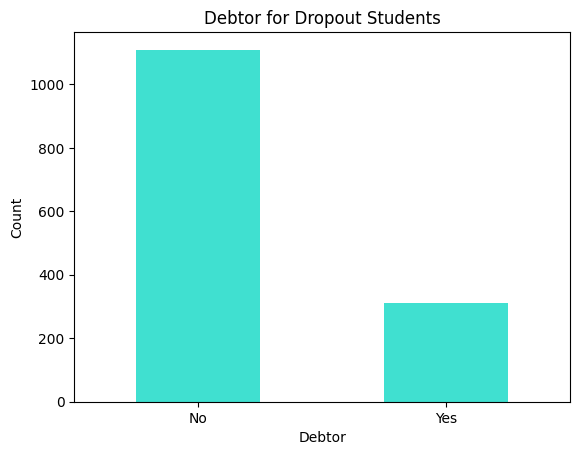

In [ ]:
# Debtor

new_data['Debtor']=new_data['Debtor'].replace({
    0: 'No',
    1: 'Yes'
})

filtered_data = new_data[new_data['Target'] == 'Dropout']

sorted_data = filtered_data.sort_values(by='Debtor', ascending=False)

value_counts = sorted_data['Debtor'].value_counts()

value_counts.plot(kind='bar', color='turquoise')
plt.xlabel('Debtor')
plt.ylabel('Count')
plt.title('Debtor for Dropout Students')
plt.xticks(rotation =0)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

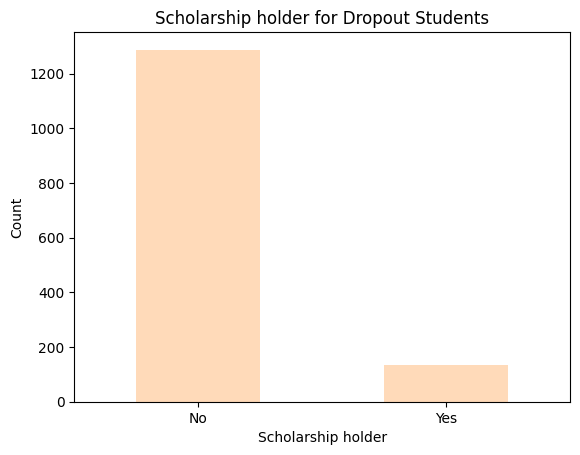

In [ ]:
# Scholarship Holder

new_data['Scholarship holder']=new_data['Scholarship holder'].replace({
    0: 'No',
    1: 'Yes'
})

filtered_data = new_data[new_data['Target'] == 'Dropout']

sorted_data = filtered_data.sort_values(by='Scholarship holder', ascending=False)

value_counts = sorted_data['Scholarship holder'].value_counts()

value_counts.plot(kind='bar', color='peachpuff')
plt.xlabel('Scholarship holder')
plt.ylabel('Count')
plt.title('Scholarship holder for Dropout Students')
plt.xticks(rotation = 0)

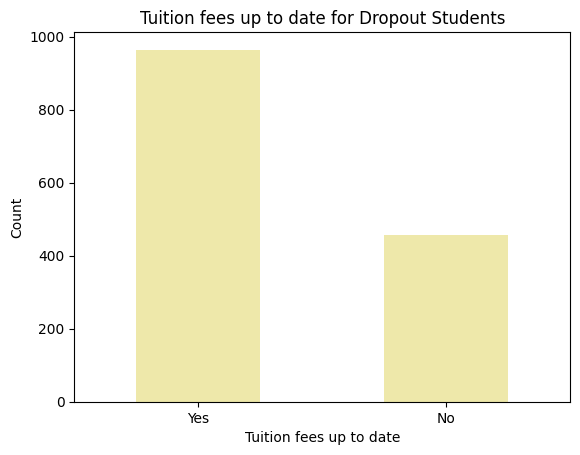

In [ ]:
# Tuition Fees

new_data['Tuition fees up to date']=new_data['Tuition fees up to date'].replace({
    0: 'No',
    1: 'Yes'
})

filtered_data = new_data[new_data['Target'] == 'Dropout']

sorted_data = filtered_data.sort_values(by='Tuition fees up to date', ascending=False)

value_counts = sorted_data['Tuition fees up to date'].value_counts()

value_counts.plot(kind='bar', color='palegoldenrod')
plt.xlabel('Tuition fees up to date')
plt.ylabel('Count')
plt.title('Tuition fees up to date for Dropout Students')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Age At Enrollment

px.histogram(new_data['Age at enrollment'], x='Age at enrollment',color_discrete_sequence=['pink'])

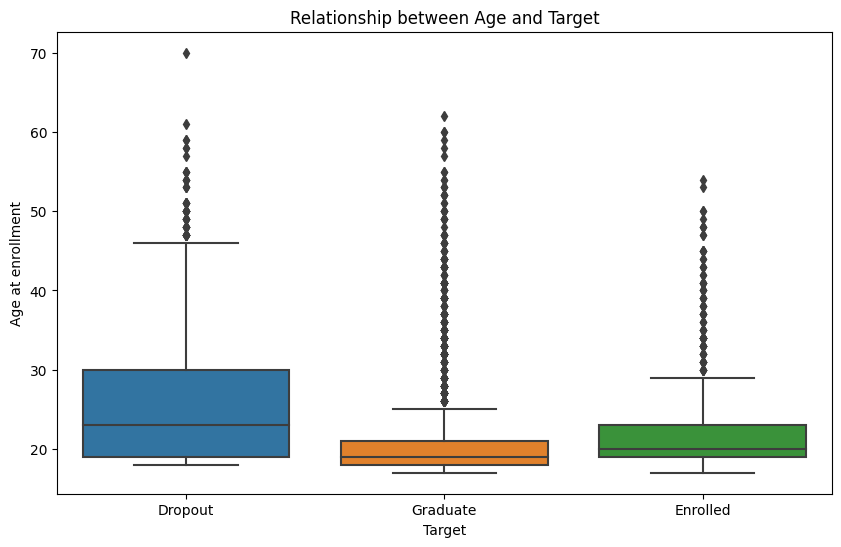

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age at enrollment', data=new_data)
plt.xlabel('Target')
plt.ylabel('Age at enrollment')
plt.title('Relationship between Age and Target')
plt.show()

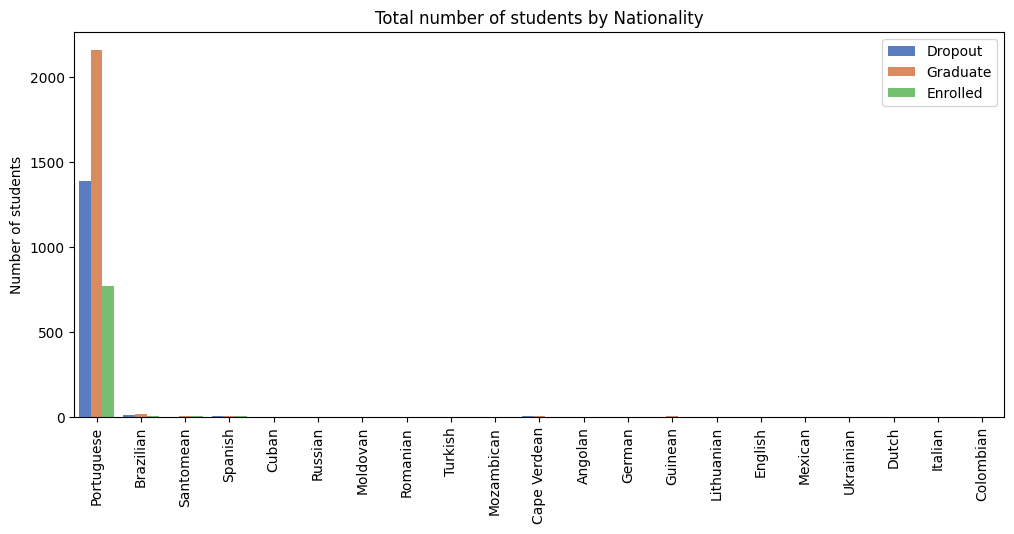

In [ ]:
# Nationality

new_data[['Nationality']] = new_data[['Nationality']].replace({'Nationality': {1: 'Portuguese', 2: 'German', 6: 'Spanish',
                                                               11: 'Italian', 13: 'Dutch', 14: 'English',
                                                               17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean',
                                                               24: 'Guinean', 25: 'Mozambican', 26: 'Santomean',
                                                               32: 'Turkish', 41: 'Brazilian', 62: 'Romanian',
                                                               100: 'Moldovan', 101: 'Mexican', 103: 'Ukrainian',
                                                               105: 'Russian', 108: 'Cuban', 109: 'Colombian'}})

fig, ax = plt.subplots(figsize=(12, 5))
order = new_data[new_data['Target'] == 'Enrolled']['Nationality'].value_counts()
ax = sns.countplot(data=new_data, x='Nationality', hue='Target', palette='muted', order=order.index)
ax.set(xlabel=None, ylabel='Number of students', title='Total number of students by Nationality')
plt.xticks(rotation=90)
ax.legend_.set_title(None)
plt.show()

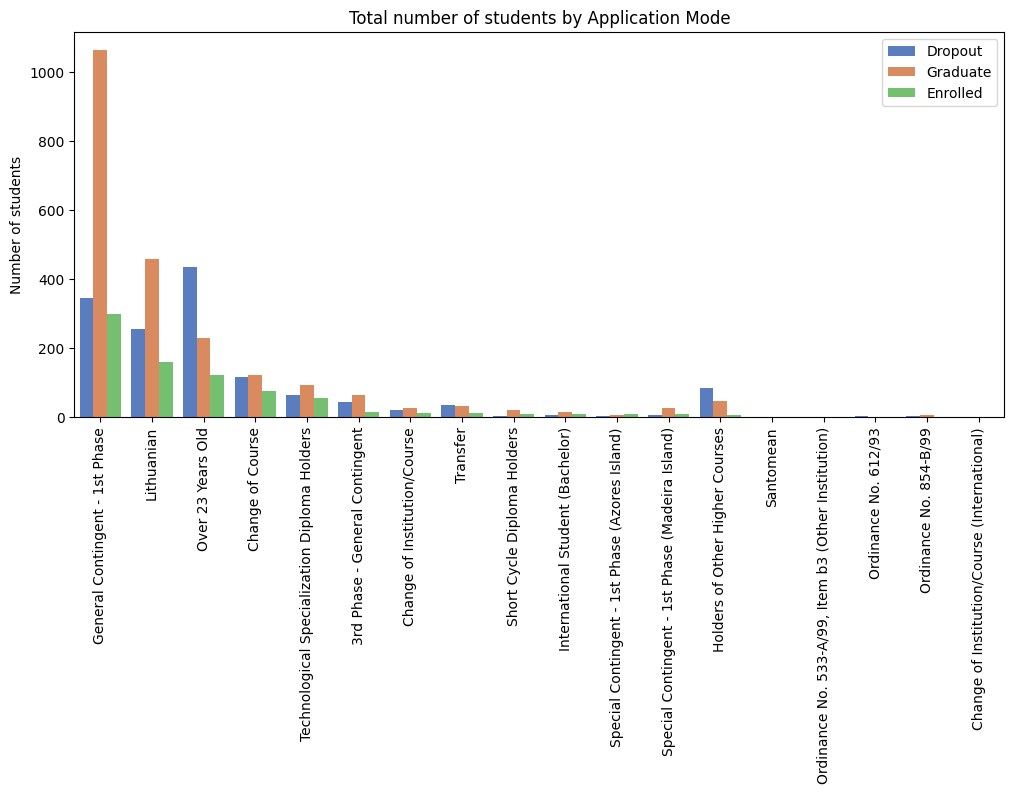

In [ ]:
# Application Mode

new_data['Application mode'] = new_data['Application mode'].replace({
    1: 'General Contingent - 1st Phase',
    2: 'Ordinance No. 612/93',
    5: 'Special Contingent - 1st Phase (Azores Island)',
    7: 'Holders of Other Higher Courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International Student (Bachelor)',
    16: 'Special Contingent - 1st Phase (Madeira Island)',
    17: '2nd Phase - General Contingent',
    18: '3rd Phase - General Contingent',
    26: 'Ordinance No. 533-A/99, Item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, Item b3 (Other Institution)',
    39: 'Over 23 Years Old',
    42: 'Transfer',
    43: 'Change of Course',
    44: 'Technological Specialization Diploma Holders',
    51: 'Change of Institution/Course',
    53: 'Short Cycle Diploma Holders',
    57: 'Change of Institution/Course (International)',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldovan',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
})

fig, ax = plt.subplots(figsize=(12, 5))
order = new_data[new_data['Target'] == 'Enrolled']['Application mode'].value_counts()
ax = sns.countplot(data=new_data, x='Application mode', hue='Target', palette='muted', order=order.index)
ax.set(xlabel=None, ylabel='Number of students', title='Total number of students by Application Mode')
plt.xticks(rotation=90)
ax.legend_.set_title(None)
plt.show()

In [ ]:
# Daytime/evening attendance

# Filter data for 'Target' equal to 0 (dropped out)
dropout_data = new_data.loc[new_data['Target'] == "Dropout"]

# Count the occurrences of each marital status
attendance_counts = dropout_data['Daytime/evening attendance'].value_counts().reset_index()

# Rename the columns for clarity in the plot
attendance_counts.columns = ['Daytime/evening attendance', 'Count']

# Calculate percentages
attendance_counts['Percentage'] = (attendance_counts['Count'] / attendance_counts['Count'].sum()) * 100

# Plotting the pie chart using plotly.express
fig = px.pie(attendance_counts, names='Daytime/evening attendance', values='Percentage', title='Daytime/evening attendance Distribution for Dropout Students', color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_traces(labels=['Daytime','Evening'], hole=0.4, textinfo='percent+label', pull=[0.1,0.1,0.1,0.1])

fig.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:2463: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



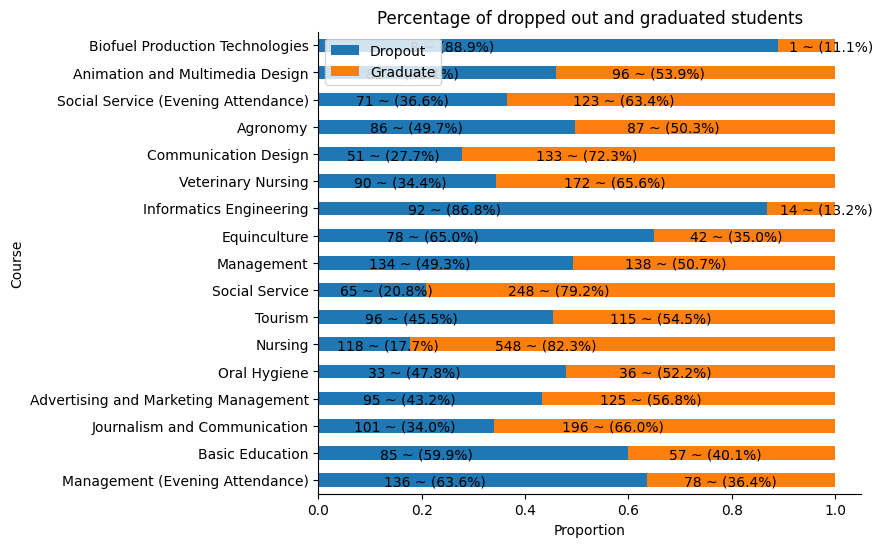

In [ ]:
# Course

new_data['Course'] = new_data['Course'].replace({
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (Evening Attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (Evening Attendance)'
})

order = [
    'Biofuel Production Technologies',
    'Animation and Multimedia Design',
    'Social Service (Evening Attendance)',
    'Agronomy',
    'Communication Design',
    'Veterinary Nursing',
    'Informatics Engineering',
    'Equinculture',
    'Management',
    'Social Service',
    'Tourism',
    'Nursing',
    'Oral Hygiene',
    'Advertising and Marketing Management',
    'Journalism and Communication',
    'Basic Education',
    'Management (Evening Attendance)'
]

# Create a stacked bar plot.
filtered_data = pd.crosstab(index=new_data['Course'], columns=new_data[new_data['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=new_data['Course'], columns=new_data[new_data['Target'] != 'Enrolled']['Target'], normalize='index')
ax = data_prop.loc[order[::-1]].plot(kind='barh', stacked=True, figsize=(7, 6))
ax.set(xlabel='Proportion', ylabel='Course')
ax.spines[['right', 'top']].set_visible(False)
ax.legend_.set_title(None)
ax.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*filtered_data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], filtered_data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.2, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

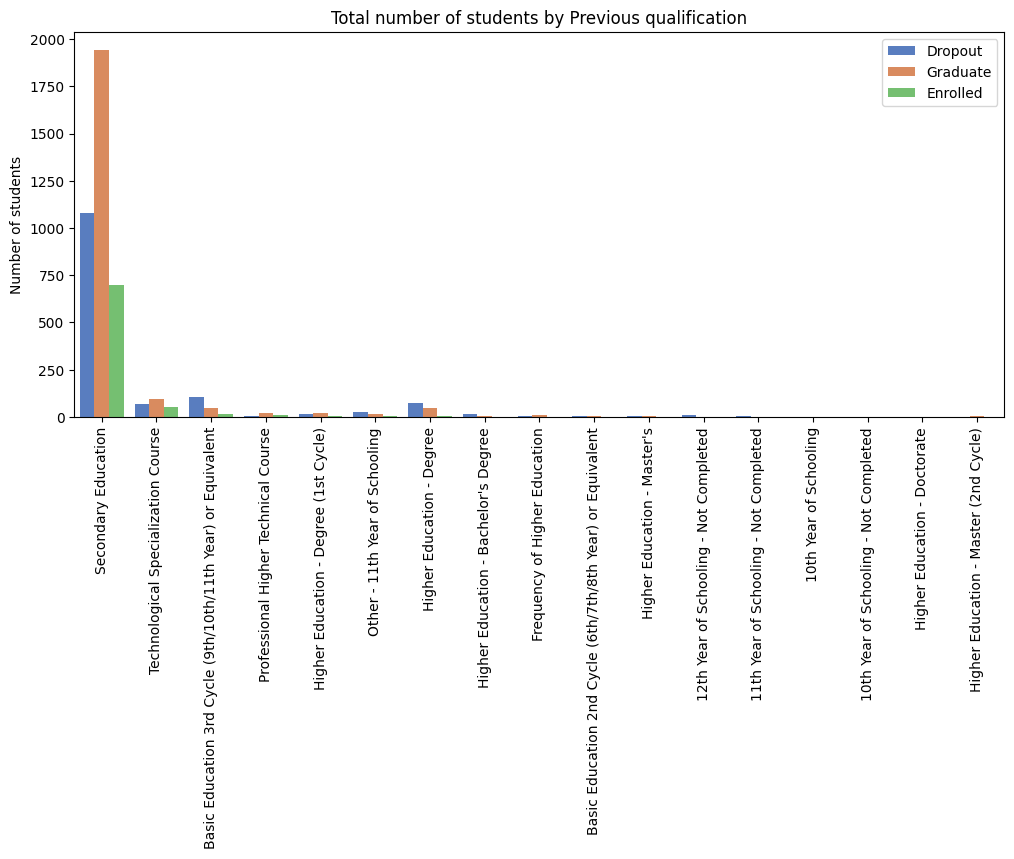

In [ ]:
# Previous Quaifications

new_data['Previous qualification'] = new_data['Previous qualification'].replace({
    1: 'Secondary Education',
    2: "Higher Education - Bachelor's Degree",
    3: 'Higher Education - Degree',
    4: "Higher Education - Master's",
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    12: 'Other - 11th Year of Schooling',
    14: '10th Year of Schooling',
    15: '10th Year of Schooling - Not Completed',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent',
    39: 'Technological Specialization Course',
    40: 'Higher Education - Degree (1st Cycle)',
    42: 'Professional Higher Technical Course',
    43: 'Higher Education - Master (2nd Cycle)'
})

fig, ax = plt.subplots(figsize=(12, 5))
order = new_data[new_data['Target'] == 'Enrolled']['Previous qualification'].value_counts()
ax = sns.countplot(data=new_data, x='Previous qualification', hue='Target', palette='muted', order=order.index)
ax.set(xlabel=None, ylabel='Number of students', title='Total number of students by Previous qualification')
plt.xticks(rotation=90)
ax.legend_.set_title(None)
plt.show()

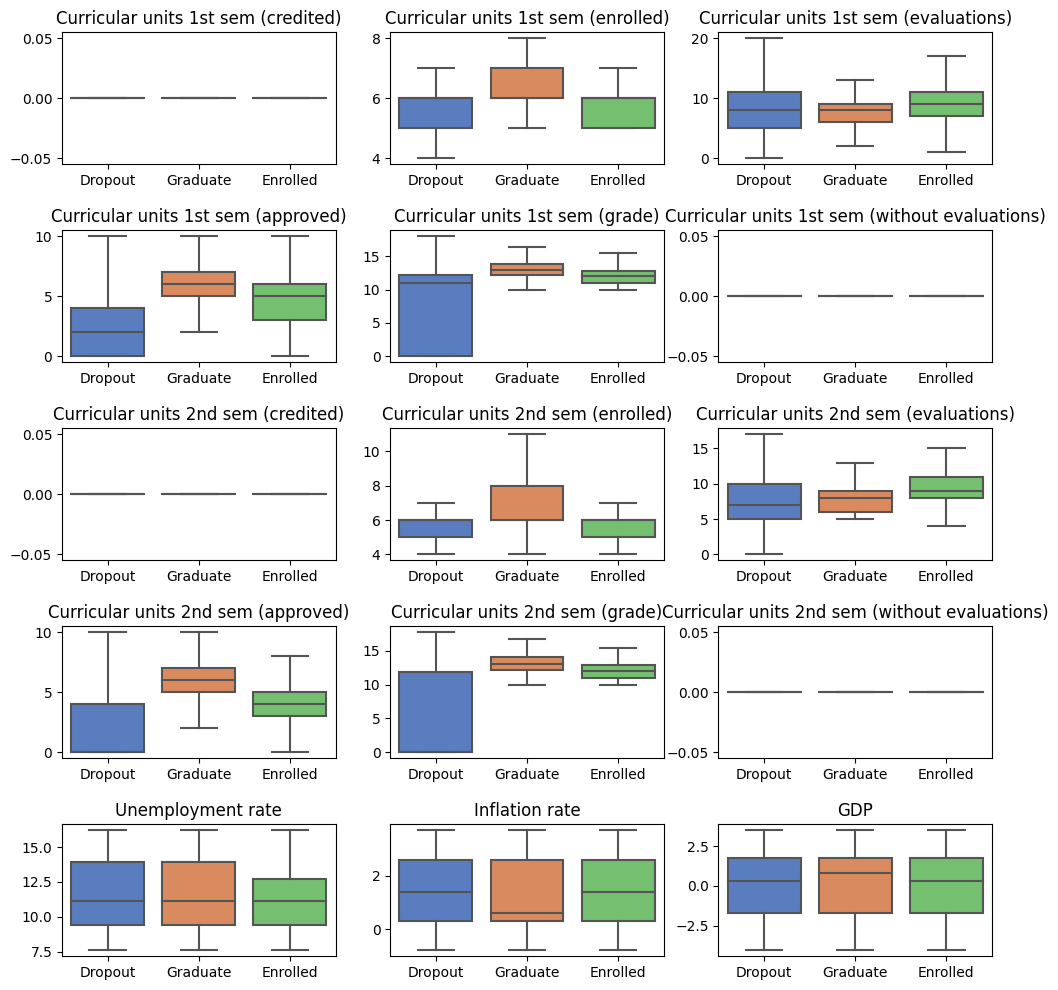

In [ ]:
# Continuous Variables

fig, axs = plt.subplots(5, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
cont_cols = ['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)',
        'Unemployment rate',
       'Inflation rate',
        'GDP']


ind = 0
for i in range(5):
    for j in range(3):
        sns.boxplot(new_data, x='Target', y=cont_cols[ind], showfliers=False, palette='muted', ax=axs[i, j])
        axs[i, j].set(xlabel=None, ylabel=None, title=cont_cols[ind])
        ind += 1

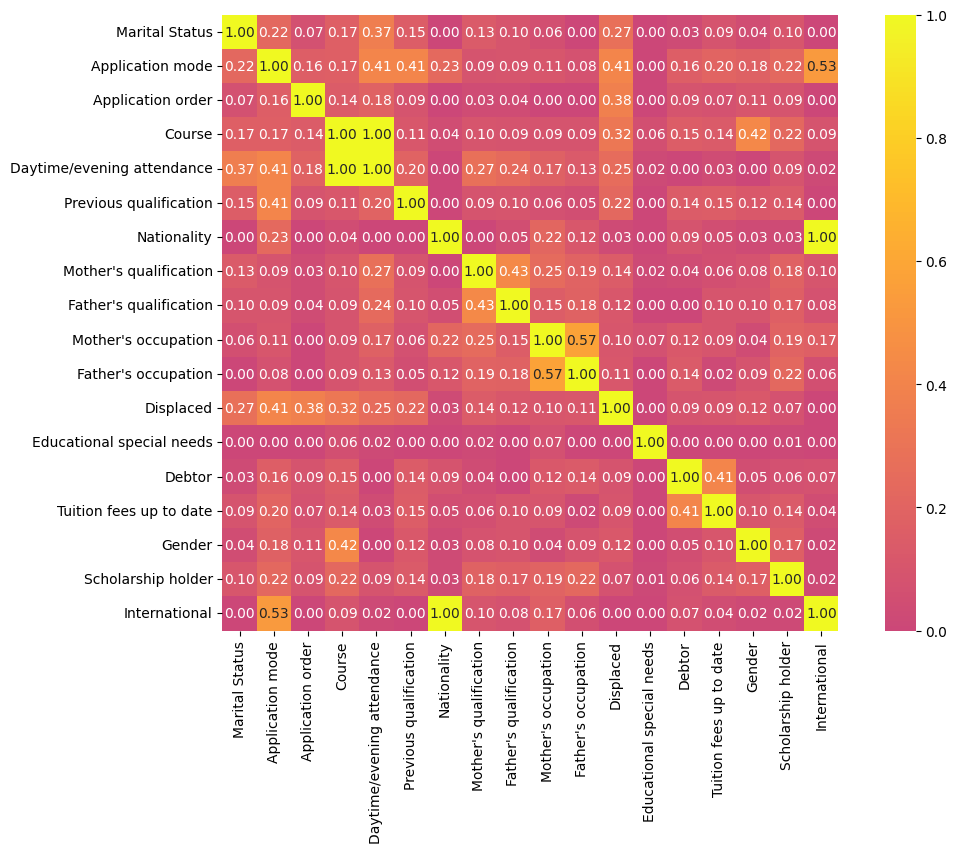

In [ ]:
# Feature Engineering

cat_data=data[cat_cols]

fig, ax = plt.subplots(figsize = (12, 8))

cramers_v = associations(cat_data, nom_nom_assoc='cramer', ax=ax, cmap='plasma')


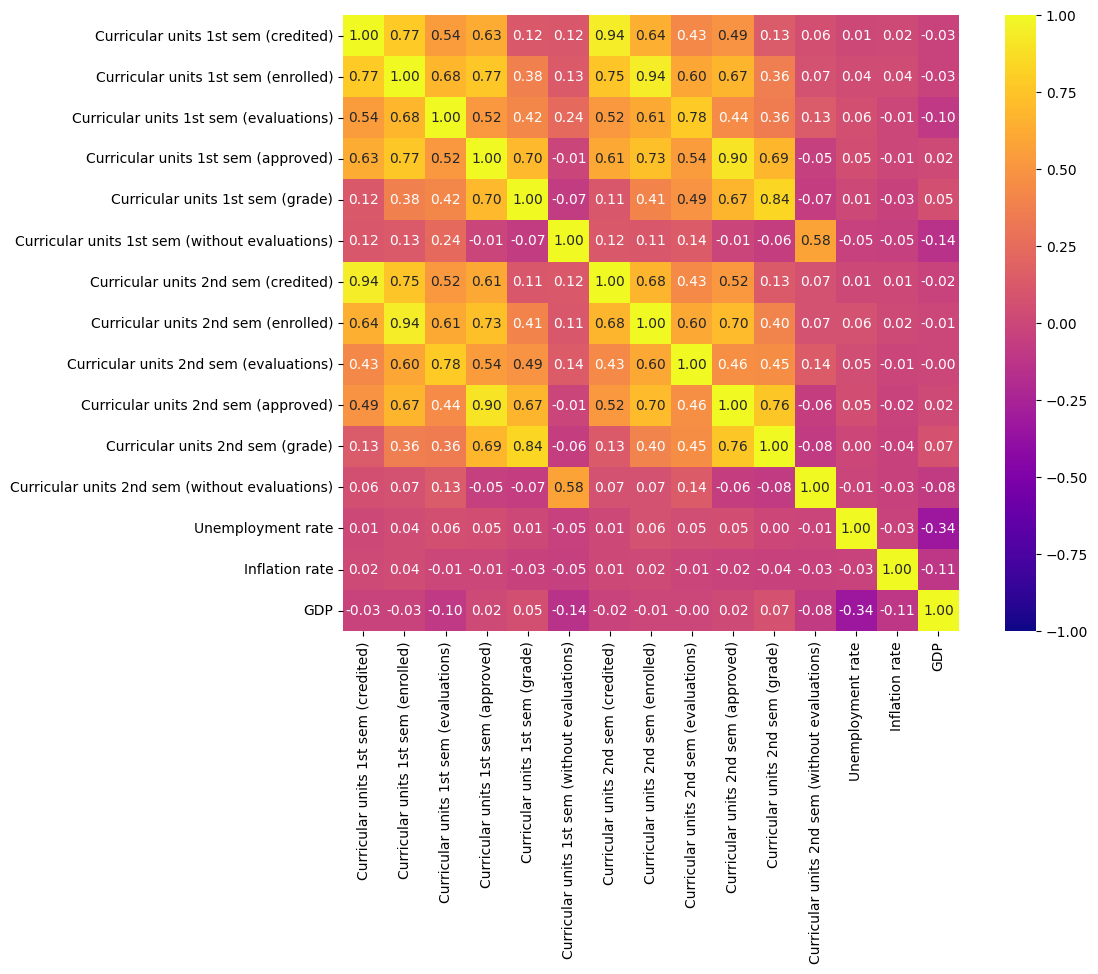

In [ ]:
cont_data=data[cont_cols]

fig, ax = plt.subplots(figsize = (12, 8))

cramers_v = associations(cont_data, nom_nom_assoc='cramer', ax=ax, cmap='plasma')


In [ ]:
# Mapping back

new_data = new_data.replace({'Tuition fees up to date': {'No': 0, 'Yes': 1}})
new_data = new_data.replace({'Scholarship holder': {'No': 0, 'Yes': 1}})
new_data = new_data.replace({'Target': {'Dropout': 0, 'Graduate': 1}})
new_data['Application mode'] = new_data['Application mode'].replace({
    'General Contingent - 1st Phase': 1,
    'Ordinance No. 612/93': 2,
    'Special Contingent - 1st Phase (Azores Island)': 5,
    'Holders of Other Higher Courses': 7,
    'Ordinance No. 854-B/99': 10,
    'International Student (Bachelor)': 15,
    'Special Contingent - 1st Phase (Madeira Island)': 16,
    '2nd Phase - General Contingent': 17,
    '3rd Phase - General Contingent': 18,
    "Ordinance No. 533-A/99, Item b2) (Different Plan)": 26,
    "Ordinance No. 533-A/99, Item b3 (Other Institution)": 27,
    'Over 23 Years Old': 39,
    'Transfer': 42,
    'Change of Course': 43,
    'Technological Specialization Diploma Holders': 44,
    'Change of Institution/Course': 51,
    'Short Cycle Diploma Holders': 53,
    'Change of Institution/Course (International)': 57,
    'Spanish': 6,
    'Italian': 11,
    'Dutch': 13,
    'English': 14,
    'Lithuanian': 17,
    'Angolan': 21,
    'Cape Verdean': 22,
    'Guinean': 24,
    'Mozambican': 25,
    'Santomean': 26,
    'Turkish': 32,
    'Brazilian': 41,
    'Romanian': 62,
    'Moldovan': 100,
    'Mexican': 101,
    'Ukrainian': 103,
    'Russian': 105,
    'Cuban': 108,
    'Colombian': 109
})

new_data['Course']=new_data['Course'].replace({
    'Biofuel Production Technologies': 33,
    'Animation and Multimedia Design': 171,
    'Social Service (Evening Attendance)': 8014,
    'Agronomy': 9003,
    'Communication Design': 9070,
    'Veterinary Nursing': 9085,
    'Informatics Engineering': 9119,
    'Equinculture': 9130,
    'Management': 9147,
    'Social Service': 9238,
    'Tourism': 9254,
    'Nursing': 9500,
    'Oral Hygiene': 9556,
    'Advertising and Marketing Management': 9670,
    'Journalism and Communication': 9773,
    'Basic Education': 9853,
    'Management (Evening Attendance)': 9991
})

new_data['Previous qualification']=new_data['Previous qualification'].replace({
    'Secondary Education': 1,
    "Higher Education - Bachelor's Degree": 2,
    'Higher Education - Degree': 3,
    "Higher Education - Master's": 4,
    'Higher Education - Doctorate': 5,
    'Frequency of Higher Education': 6,
    '12th Year of Schooling - Not Completed': 9,
    '11th Year of Schooling - Not Completed': 10,
    'Other - 11th Year of Schooling': 12,
    '10th Year of Schooling': 14,
    '10th Year of Schooling - Not Completed': 15,
    'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent': 19,
    'Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent': 38,
    'Technological Specialization Course': 39,
    'Higher Education - Degree (1st Cycle)': 40,
    'Professional Higher Technical Course': 42,
    'Higher Education - Master (2nd Cycle)': 43
})

new_data.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,Portuguese,19,12,5,9,127.3,1,0,No,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,Portuguese,1,3,3,3,142.5,1,0,No,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,Portuguese,37,37,9,9,124.8,1,0,No,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,Portuguese,38,37,5,3,119.6,1,0,No,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,Portuguese,37,38,9,9,141.5,0,0,No,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [ ]:
selected_cols = ['Application mode', 'Course', 'Previous qualification', "Mother's qualification", 'Tuition fees up to date',
        "Mother's occupation", 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)',
        'Curricular units 2nd sem (approved)', 'Target']

# Keep only relevant columns.
new_data=new_data[selected_cols]

# Remove enrolled students.
new_data = new_data[new_data['Target'] != 'Enrolled']

# Convert into numerical data type.

cols = ['Tuition fees up to date', 'Gender', 'Scholarship holder','Target']
new_data[cols] = new_data[cols].astype('int32')

In [ ]:
# Model Building

results = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Predicting variable.
y = new_data['Target']

# Predictor features.
X = new_data.copy()
X = X.drop('Target', axis = 1)

# Create training and test sets, 80% and 20% respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
def plot_roc_curve(true_y, y_prob):

    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    auc = metrics.roc_auc_score(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.text(0.95, 0.05, 'AUC = %0.3f' % auc, ha='right', weight='bold')


def print_results(algo, y_test, y_preds):

    global results
    print(algo)
    print("Accuracy:", "%.3f" % metrics.accuracy_score(y_test, y_preds))
    print("Precision:", "%.3f" % metrics.precision_score(y_test, y_preds))
    print("Recall:", "%.3f" % metrics.recall_score(y_test, y_preds))
    print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_preds))
    # Write results into a dataframe.
    row = {'Algorithm': algo, 'Accuracy': metrics.accuracy_score(y_test, y_preds),
           'Precision': metrics.precision_score(y_test, y_preds), 'Recall': metrics.recall_score(y_test, y_preds),
           'F1 Score': metrics.f1_score(y_test, y_preds)}
    results = pd.concat([results, pd.DataFrame(row, index=[0])], ignore_index=True)
    results = results.reset_index(drop=True)


def conf_matrix_plot(model, x_data, y_data):

    model_pred = model.predict(x_data)
    cm = metrics.confusion_matrix(y_data, model_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dropout', 'Graduate'], )
    disp.plot(values_format='')
    plt.show()

In [ ]:
# Naive Bayes

# Normalize data.
X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)
# Fit the model.
gnb = GaussianNB()

gnb.fit(X_scaled_train, y_train)
# Get the predictions on test data.
y_preds = gnb.predict(X_scaled_test)

print_results('Naive Bayes', y_test, y_preds)


num_iterations = 20
accuracy_scores = []

y_preds_prob_gnb = gnb.predict_proba(X_test)[:, 1]

for i in range(num_iterations):
    scores = cross_val_score(gnb, X_scaled_train, y_train, cv=20, scoring='accuracy')
    accuracy_scores.extend(scores)

# Print the average accuracy
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy over {num_iterations} iterations:", average_accuracy)

Naive Bayes
Accuracy: 0.875
Precision: 0.871
Recall: 0.935
F1 Score: 0.902


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but GaussianNB was fitted without feature names



Average Accuracy over 20 iterations: 0.8636230514879547


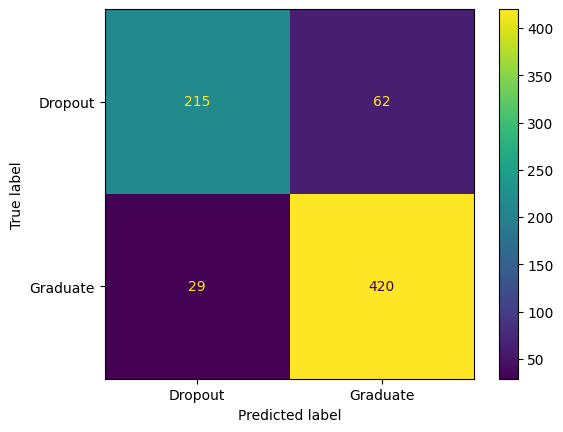

In [ ]:
conf_matrix_plot(gnb, X_scaled_test, y_test)

In [ ]:
# Logistic Regression

X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)
lr = LogisticRegression()
lr.fit(X_scaled_train, y_train)
y_preds = lr.predict(X_scaled_test)

print_results('Logistic Regression', y_test, y_preds)

num_iterations = 20
accuracy_scores = []

for i in range(num_iterations):
    scores = cross_val_score(lr, X_scaled_train, y_train, cv=20, scoring='accuracy')
    accuracy_scores.extend(scores)

y_preds_prob_lr = lr.predict_proba(X_scaled_test)[:, 1]

# Print the average accuracy
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy over {num_iterations} iterations:", average_accuracy)

Logistic Regression
Accuracy: 0.883
Precision: 0.889
Recall: 0.927
F1 Score: 0.907
Average Accuracy over 20 iterations: 0.8894544166273


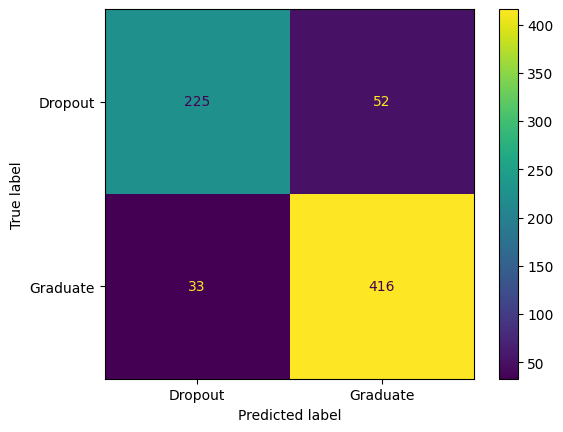

In [ ]:
conf_matrix_plot(lr, X_scaled_test, y_test)

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
y_preds = decision_tree.predict(X_test)

print_results('Decision Tree', y_test, y_preds)

num_iterations = 20
accuracy_scores = []

for i in range(num_iterations):
    scores = cross_val_score(decision_tree, X_scaled_train, y_train, cv=20, scoring='accuracy')
    accuracy_scores.extend(scores)

y_preds_prob_dt = decision_tree.predict_proba(X_test)[:, 1]

# Print the average accuracy
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy over {num_iterations} iterations:", average_accuracy)

Decision Tree
Accuracy: 0.832
Precision: 0.883
Recall: 0.840
F1 Score: 0.861
Average Accuracy over 20 iterations: 0.8401771374586703


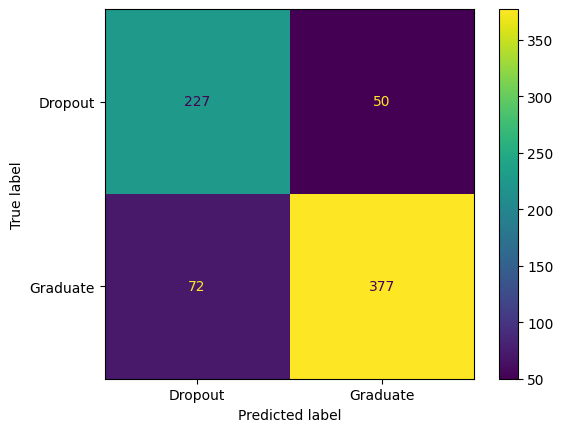

In [ ]:
conf_matrix_plot(decision_tree, X_test, y_test)

In [ ]:
# Random Forest

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)

print_results('Random forest', y_test, y_preds)

num_iterations = 20
accuracy_scores = []

y_preds_prob_rf = rf.predict_proba(X_test)[:, 1]

for i in range(num_iterations):
    scores = cross_val_score(rf, X_scaled_train, y_train, cv=20, scoring='accuracy')
    accuracy_scores.extend(scores)

# Print the average accuracy
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy over {num_iterations} iterations:", average_accuracy)

Random forest
Accuracy: 0.883
Precision: 0.881
Recall: 0.938
F1 Score: 0.908
Average Accuracy over 20 iterations: 0.8880538497874321


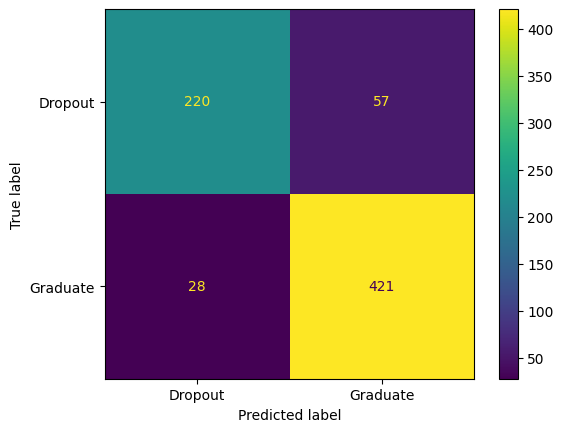

In [ ]:
conf_matrix_plot(rf, X_test, y_test)

In [ ]:
# SVM

X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)
svm = SVC(probability=True)
svm.fit(X_scaled_train, y_train)
y_preds = svm.predict(X_scaled_test)

print_results('SVM', y_test, y_preds)

num_iterations = 20
accuracy_scores = []

y_preds_prob_svm = svm.predict_proba(X_scaled_test)[:, 1]

for i in range(num_iterations):
    scores = cross_val_score(svm, X_scaled_train, y_train, cv=20, scoring='accuracy')
    accuracy_scores.extend(scores)

# Print the average accuracy
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy over {num_iterations} iterations:", average_accuracy)

SVM
Accuracy: 0.888
Precision: 0.872
Recall: 0.960
F1 Score: 0.914
Average Accuracy over 20 iterations: 0.898398677373639


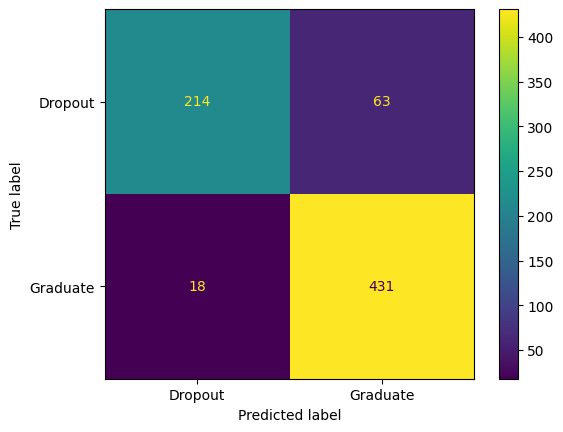

In [ ]:
conf_matrix_plot(svm, X_scaled_test, y_test)

In [ ]:
# Compare models.
results_unique=results.drop_duplicates()
results_unique.sort_values(by=['Accuracy'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
4,SVM,0.888430,0.872470,0.959911,0.914104
1,Logistic Regression,0.882920,0.888889,0.926503,0.907306
3,Random forest,0.882920,0.880753,0.937639,0.908306
0,Naive Bayes,0.874656,0.871369,0.935412,0.902256
2,Decision Tree,0.831956,0.882904,0.839644,0.860731


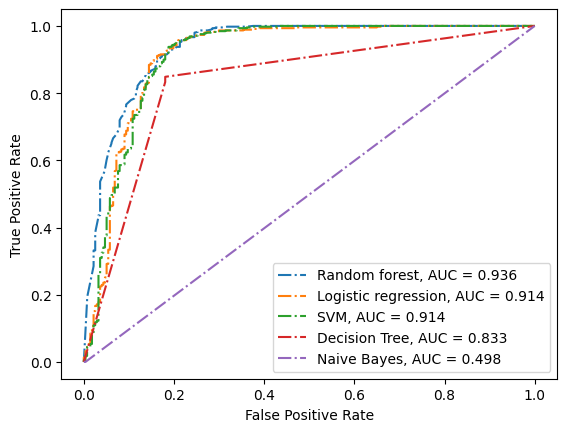

In [ ]:
y_preds_probs = {'Naive Bayes': y_preds_prob_gnb, 'Logistic regression': y_preds_prob_lr, 'SVM': y_preds_prob_svm,
                 'Decision Tree': y_preds_prob_dt, 'Random forest': y_preds_prob_rf}

aucs = {}
for i in y_preds_probs.keys():
    aucs[i] = metrics.roc_auc_score(y_test, y_preds_probs[i])

for i in dict(sorted(aucs.items(), key=operator.itemgetter(1), reverse=True)).keys():
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds_probs[i])
    auc = aucs[i]
    plt.plot(fpr, tpr, linestyle='dashdot', label=f'{i}, AUC = {auc:.3f}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()